Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 7.27

Analysis of salaries of NBA players in the 2017/2018 season, which shows that the mean is distorted by extreme values, as opposed to the median\
Topics and relevant videos: [Sensitivity of the mean to outliers](https://www.youtube.com/watch?v=Mgbphvi_E58), [median](https://www.youtube.com/watch?v=mR3nc8rW-P4)

Author: Carlos Fernandez-Granda\
Data source: https://www.kaggle.com/datasets/koki25ando/salary

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import urllib.request
import io

# data_file = '../data/NBA_season1718_salary.csv'

# salaries_list = []
# with open(data_file, newline='') as csvfile:
#      reader = csv.reader(csvfile, delimiter=',')
#      reader.__next__()
#      for row in reader:
#         salaries_list.append(float(row[3]))
         
url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/NBA_season1718_salary.csv"

salaries_list = []
with urllib.request.urlopen(url) as response:
    csvfile = io.TextIOWrapper(response, encoding='utf-8')
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # Skip header
    for row in reader:
        salaries_list.append(float(row[3]))
        
salaries = np.array(salaries_list)/1e6

mean_salary = np.mean(salaries)
median_salary = np.median(salaries)

print("Mean salary: " + str(round(mean_salary,3)))
print("Fraction of players under the mean: " + str(round(np.sum(salaries <= mean_salary)/len(salaries),3)))
print("Median salary: " + str(round(median_salary,3)))
print("Standard deviation: " + str(round(np.std(salaries),3)))

Mean salary: 5.859
Fraction of players under the mean: 0.679
Median salary: 2.387
Standard deviation: 7.156


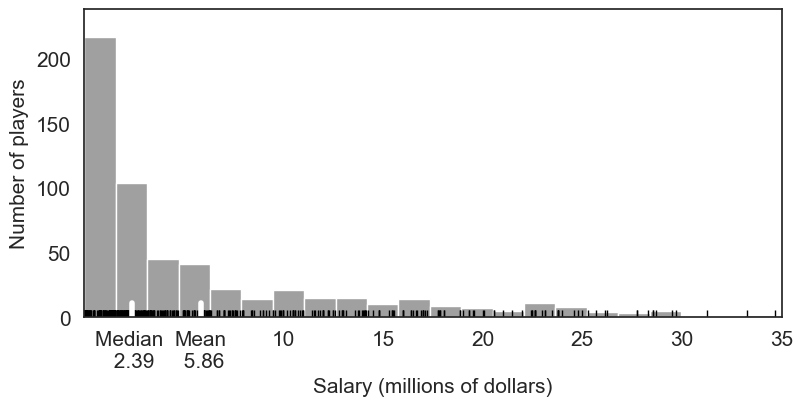

In [2]:
font_size = 15
plt.figure(figsize=(9,4))
sns.set(style='white')
# ax = sns.distplot(salaries, rug=True,kde = False, hist=True, rug_kws={"color": "black"},
#                  hist_kws={"color": 'grey'})
sns.histplot(salaries,color="grey")
sns.rugplot(data=salaries,color="black")
plt.xticks([median_salary,mean_salary,10,15,20,25,30,35],['Median \n 2.39','Mean\n 5.86',10,15,20,25,30,35])
plt.plot([mean_salary,mean_salary],[0,11],lw=4,color = 'white')
plt.plot([median_salary,median_salary],[0,11],lw=4,color = 'white')
plt.ylabel('Number of players',fontsize=font_size,labelpad=5)
plt.xlabel('Salary (millions of dollars)',fontsize=font_size)
plt.xlim([0,35])
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
sns.set(style='white');